In [36]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt


#### csv 파일 읽기

In [15]:
irisdata = pd.read_csv('IrisData.csv')

#### 실습 #5 : iris 데이터를 종별로 분리하여 20개씩 샘플링한 결과를 결합\
   * Species를 통한 분류 

In [114]:
df =irisdata.groupby('Species')

#### 품종별 분리

In [115]:
vir     = df.get_group('virginica')
ver    = df.get_group('versicolor')
setto  = df.get_group('setosa')


#### 품종별 20개의 랜덤으로 추출

In [116]:

vir_r = vir.sample(n=20)
sot_r = setto.sample(n=20)
ver_r = ver.sample(n=20)
       

#### 품종별 결합

In [143]:
print("#### 결합 ####")

arr = vir_r.append(sot_r)
arr = arr.append(ver_r)

#### 결합 ####


(1)3개 종에 대한 boxplot  (subplot 이용) 

(2)3개 종에 대한 histogram  

(3)3개 종에 대한 scatter plot을 결합

   (3-1)Sepal width, Petal width 이용 
   
   (3-2)Sepal length, Petal length 이용 
   
(4) 결합된 데이터의 scatter matrix  

(5) 결합된 데이터의 평균에 대한 bar, pie plot 


#### (1)3개 종에 대한 boxplot (subplot 이용)

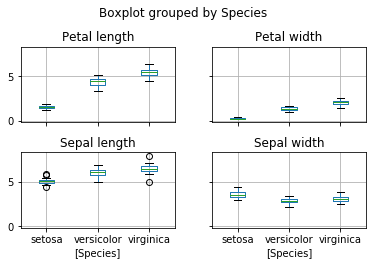

In [147]:
arr.boxplot(by='Species')
plt.tight_layout(pad=3,h_pad=1)
plt.show()


2)3개 종에 대한 histogram

Species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

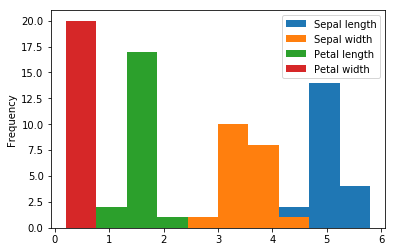

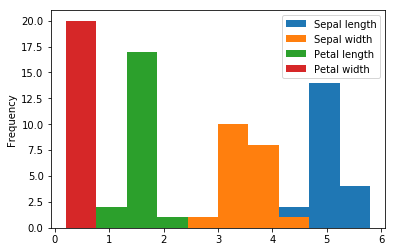

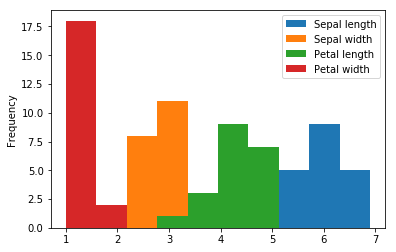

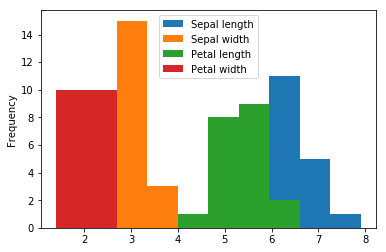

In [158]:
dt = arr.groupby(arr['Species'])
dt.plot.hist(rot=0)
시발


(3)3개 종에 대한 scatter plot을 결합

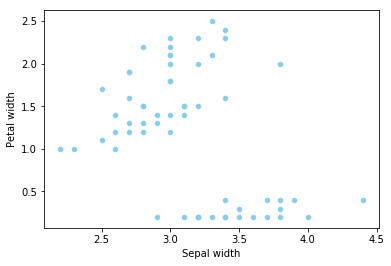

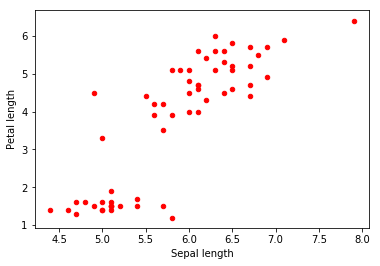

In [125]:


arr.plot.scatter(x='Sepal width',y='Petal width',color='Skyblue' )
arr.plot.scatter(x='Sepal length',y='Petal length',color='red')



(3-1)Sepal width, Petal width 이용

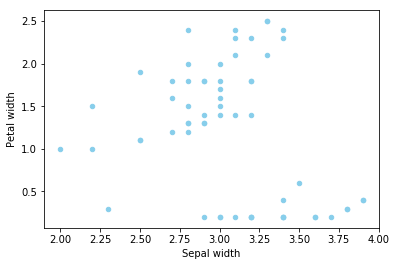

In [23]:
arr.plot.scatter(x='Sepal width',y='Petal width',color='Skyblue' )



#### (3-2)Sepal length, Petal length 이용



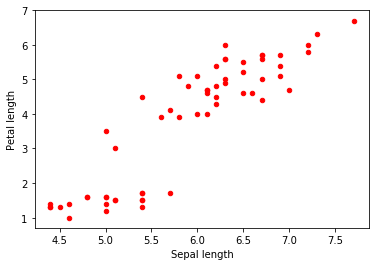

In [24]:
arr.plot.scatter(x='Sepal length',y='Petal length',color='red')

#### Species 
    문자열로는 표현이 불가? 하여서 숫자형 범주로 변환 하여  3개의 품종을 구별 한다.
    * setosa     ->  3 
    * versicolor ->  1
    * virginica  ->  2
   
    

In [25]:
arr.loc[arr['Species']=='setosa', ['Species']   ]      = 3
arr.loc[arr['Species']=='versicolor', ['Species'] ]    = 1
arr.loc[arr['Species']=='virginica', ['Species']   ]   = 2                      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf12415400>,
      dtype=object)

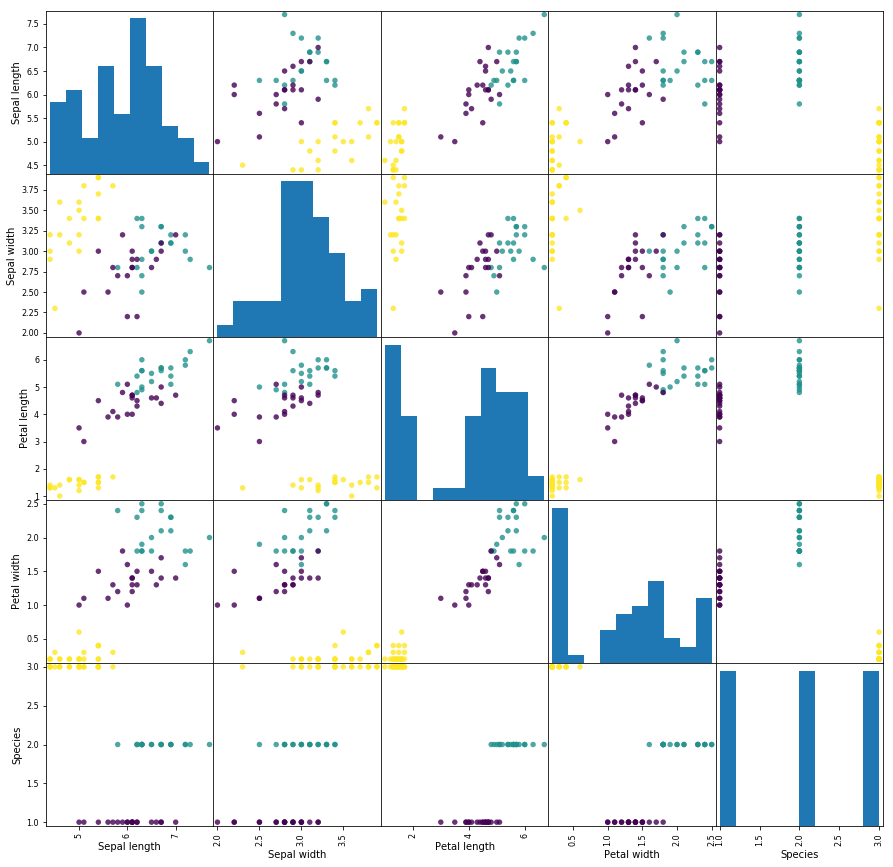

In [37]:
pd.plotting.scatter_matrix(arr,s=30,figsize=(15,15),marker='o',alpha=.8,diagonal='hist',c = arr['Species'], cmap='viridis')

In [62]:
# 값을 원래값으로 되돌려 놓는다.
arr.loc[arr['Species']== 3, ['Species']   ] = 'setosa'
arr.loc[arr['Species']== 1, ['Species'] ]    = 'versicolor'
arr.loc[arr['Species']== 2, ['Species']   ]   = 'virginica'   

##### (5) 결합된 데이터의 평균에 대한 bar, pie plot
      
      * 품종별 각 평균을 구한다. mean() 함수 이용
      * 품종별 평균을 이용하여 bar,pie plot 그래프를 완성 시킨다.
      * pie polt는 컬럼별 품종의 차이를 볼 수 있다.

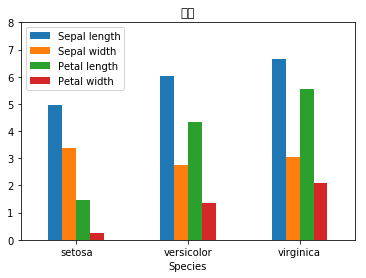

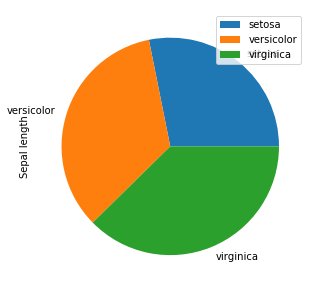

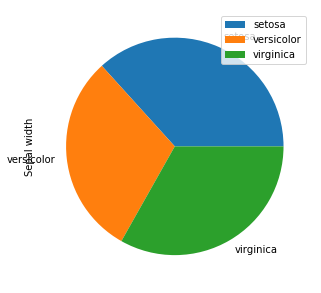

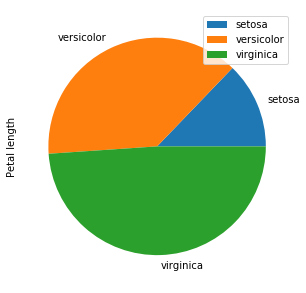

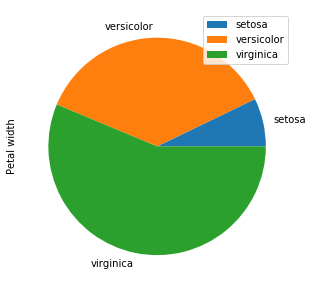

In [93]:
dt = arr.groupby(arr['Species']).mean()

dt.plot.bar(rot=0)
plt.title("종별")
plt.ylim(0,8)
plt.show()


dt.plot.pie(y=0,figsize=(5,5))
dt.plot.pie(y=1,figsize=(5,5))
dt.plot.pie(y=2,figsize=(5,5))
dt.plot.pie(y=3,figsize=(5,5))

